
Before:
epsilon = 1e-10
a       = 0
b       = 10
p       = 0.9
q       = -8.999999999999996
alpha   = 0.777
beta    = 0.888
lambda  = 0.555
eta1    = 1.0
eta2    = 1.0
sigma   = 0.333
Parameters were synchronized. Continue.

After:
epsilon = 1e-10
a       = 1
b       = 2.718281828459045
p       = 1.8
q       = 2.25
alpha   = 0.6
beta    = 0.6666666666666666
lambda  = 0.2
eta1    = 1.0
eta2    = 2.0
sigma   = 0.5
[10. 20. 40.]
Loading the best numerical solution ...
1.0 2.718281828459045
-0.6814887874872317 0.340744393743616
        10,  Max|Uexa - U_N| =  2.890E-01,  L2 |Uexa - U_N| =  9.856E-02


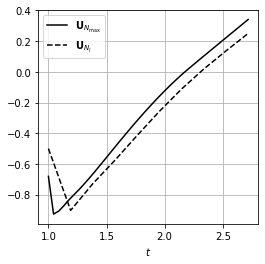

        20,  Max|Uexa - U_N| =  1.193E-01,  L2 |Uexa - U_N| =  3.601E-02


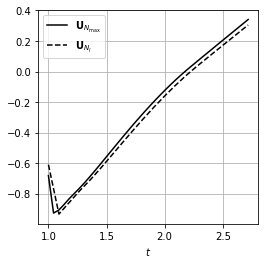

        40,  Max|Uexa - U_N| =  0.000E+00,  L2 |Uexa - U_N| =  0.000E+00


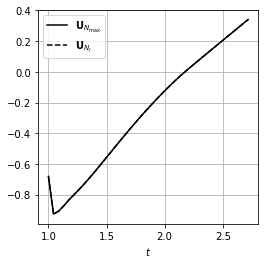

[0.28901072 0.11926524 0.        ]


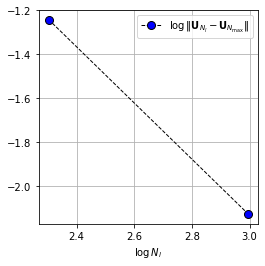

In [1]:
#!/usr/bin/env python
# coding: utf-8


import os
import numpy as np 
from   scipy.special import gamma
import scipy.interpolate as si
#import scipy.linalg as la
from   scipy.interpolate import Akima1DInterpolator as scipy_akima

#

from mittag_leffler import ml 
from inc_post import * 
from inc_sub2 import * 

################################################################################
#
# Select the numerical test by setting fprefix as follows:
#   Example 4.1 (a)     fprefix = "ex01a"  with psi = t 
#   Example 4.1 (b)     fprefix = "ex01b"  with psi = e^(5t)
#   Example 4.2         fprefix = "ex02a"
#   Example 4.3 (a)     fprefix = "ex03a"  without noise to input 
#*  Example 4.3 (b)     fprefix = "ex03b"  with noise to input (SEPARATED)
#
#
# Define the number of N_l = 10 * 2^(l) for l=0,lmax-1: 
#   lmax = 3    To check if the code works properly.
#   lmax = 11   To run fully for the manuscript. But it takes time! 
#

#fprefix = "ex01a"
#fprefix = "ex01b"
#fprefix = "ex02a"
fprefix = "ex03a"


lmax = 3


#

plotReport = True 
#plotReport = False
plotSol = True 
plotErr = True  
plotdU  = False 

#
# To define some important paths for output:

OUTDIR, FIGDIR = make_paths()



###############################################################################

if   fprefix == "ex01a":
    from inc_ex1a  import * 
    HaveExact = True  
#    
elif fprefix == "ex01b":
    from inc_ex1b  import * 
    HaveExact = True  
#    
elif fprefix == "ex02a":
    from inc_ex2a  import * 
    HaveExact = True  
#
elif fprefix == "ex03a":
    from inc_ex3a  import * 
    HaveExact = False 
    furef = "ex03a"
    luref = lmax-1
    Nuref = int(10 * int(2)**luref)
#
#elif fprefix == "ex03b":
#   from inc_ex3b  import * 
#   HaveExact = False 
#   furef = "ex03a"
#   luref = lmax-1
#   Nuref = int(10 * int(2)**luref)
#





print ( '\nBefore:' )
parameter_show () 

parameter_sync ( 
    c_epsilon, c_a, c_b, c_p, c_q, c_alpha, c_beta, 
    c_lambda, c_eta1, c_eta2, c_sigma )

print ( '\nAfter:' )
parameter_show () 


Ni = 500 + 2 

ti = np.linspace( c_a, c_b, Ni )

#print ( ti )




###############################################################################

# to save array of N:
a_N    = np.zeros( lmax )

for l in range(0,lmax):
    a_N[l] = int(10 * int(2)**l)

print ( a_N )
#

a_Err  = np.zeros( lmax )


#
#  loading U "exact"



l = lmax - 1
N = int(a_N[l])

if ( HaveExact ):
    print ( 'Loading the exact solution, ...' ) 
    tE = np.linspace ( c_a, c_b, N )
    UE = f_uexact ( tE ) 
else:
#   Pick up the reference:
    print ( 'Loading the best numerical solution ...' ) 
    funame = os.path.join( OUTDIR, furef + str('-Umild') + intshift(luref,3) )
    tE, UE = load_U ( luref, funame )
#


print ( tE[0], tE[N-1]  )
print ( UE[0], UE[N-1]  )



for l in range ( 0, lmax ):

    N = int(a_N[l])

    funame = os.path.join( OUTDIR, fprefix + str('-Umild') + intshift(l,3) ) 
    t, Uc = load_U ( l, funame )

#   print ( t[0],  t[N-1]  )
#   print ( Uc[0], Uc[N-1]  )

    e0, e2 = f_errint ( ti, tE, UE, t, Uc )

    a_Err[l] = e0 

    print ( "%10d,  Max|Uexa - U_N| = %10.3E,  L2 |Uexa - U_N| = %10.3E"%( \
        N, e0, e2) )

    if ( plotSol ):
        funame = os.path.join( FIGDIR, fprefix + str('-Ucomp') + intshift(l,3)) 
        if ( HaveExact ) :
            plot_Sols_1 ( t, Uc, tE, UE, fname=funame, report=plotReport )
        else:
            plot_Sols_2 ( t, Uc, tE, UE, fname=funame, report=plotReport )


    if ( plotdU ):
        funame = os.path.join( FIGDIR, fprefix + str('-dUnum') + intshift(l,3) )
        if ( HaveExact ):
            Ue = f_uexact ( t )
            print ( "Calculating D U_exact ... " )
            xi, dUe = f_Dfrac ( t, Ue, c_alpha, f_psi )
            print ( "Calculating D U_calc. ... " )
            xi, dU  = f_Dfrac ( t, Uc, c_alpha, f_psi )

            print ( "Plotting both D U_exact and D U_calc." )
            plot_dU ( xi, dU, dUref=dUe, fname=funame, report=plotReport ) 

            e0, e2 = f_errest ( dUe, dU )

            print ( \
                "%10d,  Max|dUexa - dU_N| = %10.3E,  L2 |dUexa - dU_N| = %10.3E"%(\
                N, e0, e2) )

        else:
            xi, dU = f_Dfrac ( t, Uc, c_alpha, f_psi )
            plot_dU ( xi, dU, fname=funame, report=plotReport ) 
#
    t  = None 
    Uc = None 
#



print ( a_Err )


if ( plotErr ): 

    if ( HaveExact ):
        fname = os.path.join( FIGDIR, fprefix + str('-eConvR0') )
        plot_Err_1 ( lmax, a_N, a_Err, 
            fname=fname, report=plotReport, alog=True )
    else:
        fname = os.path.join( FIGDIR, fprefix + str('-EConvR0') )
        plot_Err_2 ( lmax, a_N[0:lmax-1], a_Err[0:lmax-1], 
            fname=fname, report=plotReport, alog=True )


#
